In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal as deci
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
get_ipython().magic('matplotlib inline')
plt.rcParams['figure.figsize'] = [10,8]

In [2]:
a_pars = pd.read_csv('avg_pars.csv', header = None).values.squeeze()
a_logr = pd.read_csv('avg_ratio_log.csv', header = None).values.squeeze()
a_conc = pd.read_csv('avg_conc.csv', header = None).values.squeeze()
a_pH = pd.read_csv('avg_pH.csv', header = None).values.squeeze()
c_pars = pd.read_csv('pars.csv', header = None).values.squeeze()
c_conc = pd.read_csv('conc.csv', header = None).values.squeeze()
c_pH = pd.read_csv('pH.csv', header = None).values.squeeze()
concs = pd.read_csv('concs.csv', header = None).values.squeeze()
pHs = pd.read_csv('pHs.csv', header = None).values.squeeze()

In [3]:
c_logr = np.log10(c_pars[:,6]/c_pars[:,9])

In [4]:
def mymetric(yexp, ypred):
    yexp=yexp.squeeze()
    ypred=ypred.squeeze()
    d = np.sum((yexp - ypred)**2 )
    d = d / len(yexp)
    d = np.sqrt(d)
    d = d / np.mean(yexp)
    d = 100 * d
    return d

In [5]:
def mystddev(yexp,ypred):
    yexp=yexp.squeeze()
    ypred=ypred.squeeze()
    sy=np.std(ypred)
    d = np.sum(yexp - ypred) / np.sqrt(np.sum((yexp - ypred)**2 ))
    d = d / np.sqrt(len(yexp))
    d = d / np.mean(yexp)
    d = 100 * d
    sd=np.sqrt(np.square(d)*np.square(sy))
    return sd

In [6]:
def rsq(yexp, ypred):
    yexp=yexp.squeeze()
    ypred=ypred.squeeze()
    d = np.sum((yexp - ypred)**2 )
    d = 1-d / ((len(yexp)-1)*np.var(yexp))
    return d

In [7]:
a_conc

array([ 13.42,  16.77,  20.97,  26.21,  32.76,  40.96,  51.2 ,  64.  ,
        80.  ,  13.42,  16.77,  20.97,  26.21,  32.76,  40.96,  51.2 ,
        64.  ,  80.  ,  13.42,  16.77,  20.97,  26.21,  32.76,  40.96,
        51.2 ,  64.  ,  80.  ,  13.42,  16.77,  20.97,  26.21,  32.76,
        40.96,  51.2 ,  64.  ,  80.  ,  13.42,  16.77,  20.97,  32.76,
        40.96,  51.2 ,  64.  ,  80.  ,  13.42,  16.77,  20.97,  26.21,
        32.76,  40.96,  51.2 ,  64.  ,  80.  ,  13.42,  16.77,  20.97,
        26.21,  32.76,  40.96,  51.2 ,  64.  ,  80.  ,  13.42,  16.77,
        20.97,  26.21,  32.76,  40.96,  51.2 ,  64.  ,  80.  ])

In [8]:
Y_voxel = c_pH
X_voxel = c_logr
Ys = np.sort(pHs)

training_conc = 20.97

X_train = a_logr[a_conc==training_conc]
Y_train = a_pH[a_conc==training_conc]

X_train = X_train[pHs!=8] # Cuts out pH 8
Y_train = Y_train[pHs!=8]

X_test = a_logr
Y_test = a_pH

In [24]:
plt.plot?

In [32]:
plt.legend?

RSQ for ratiometric training:  0.986087581259
NRMSE for ratiometric training:  0.745011829717 %


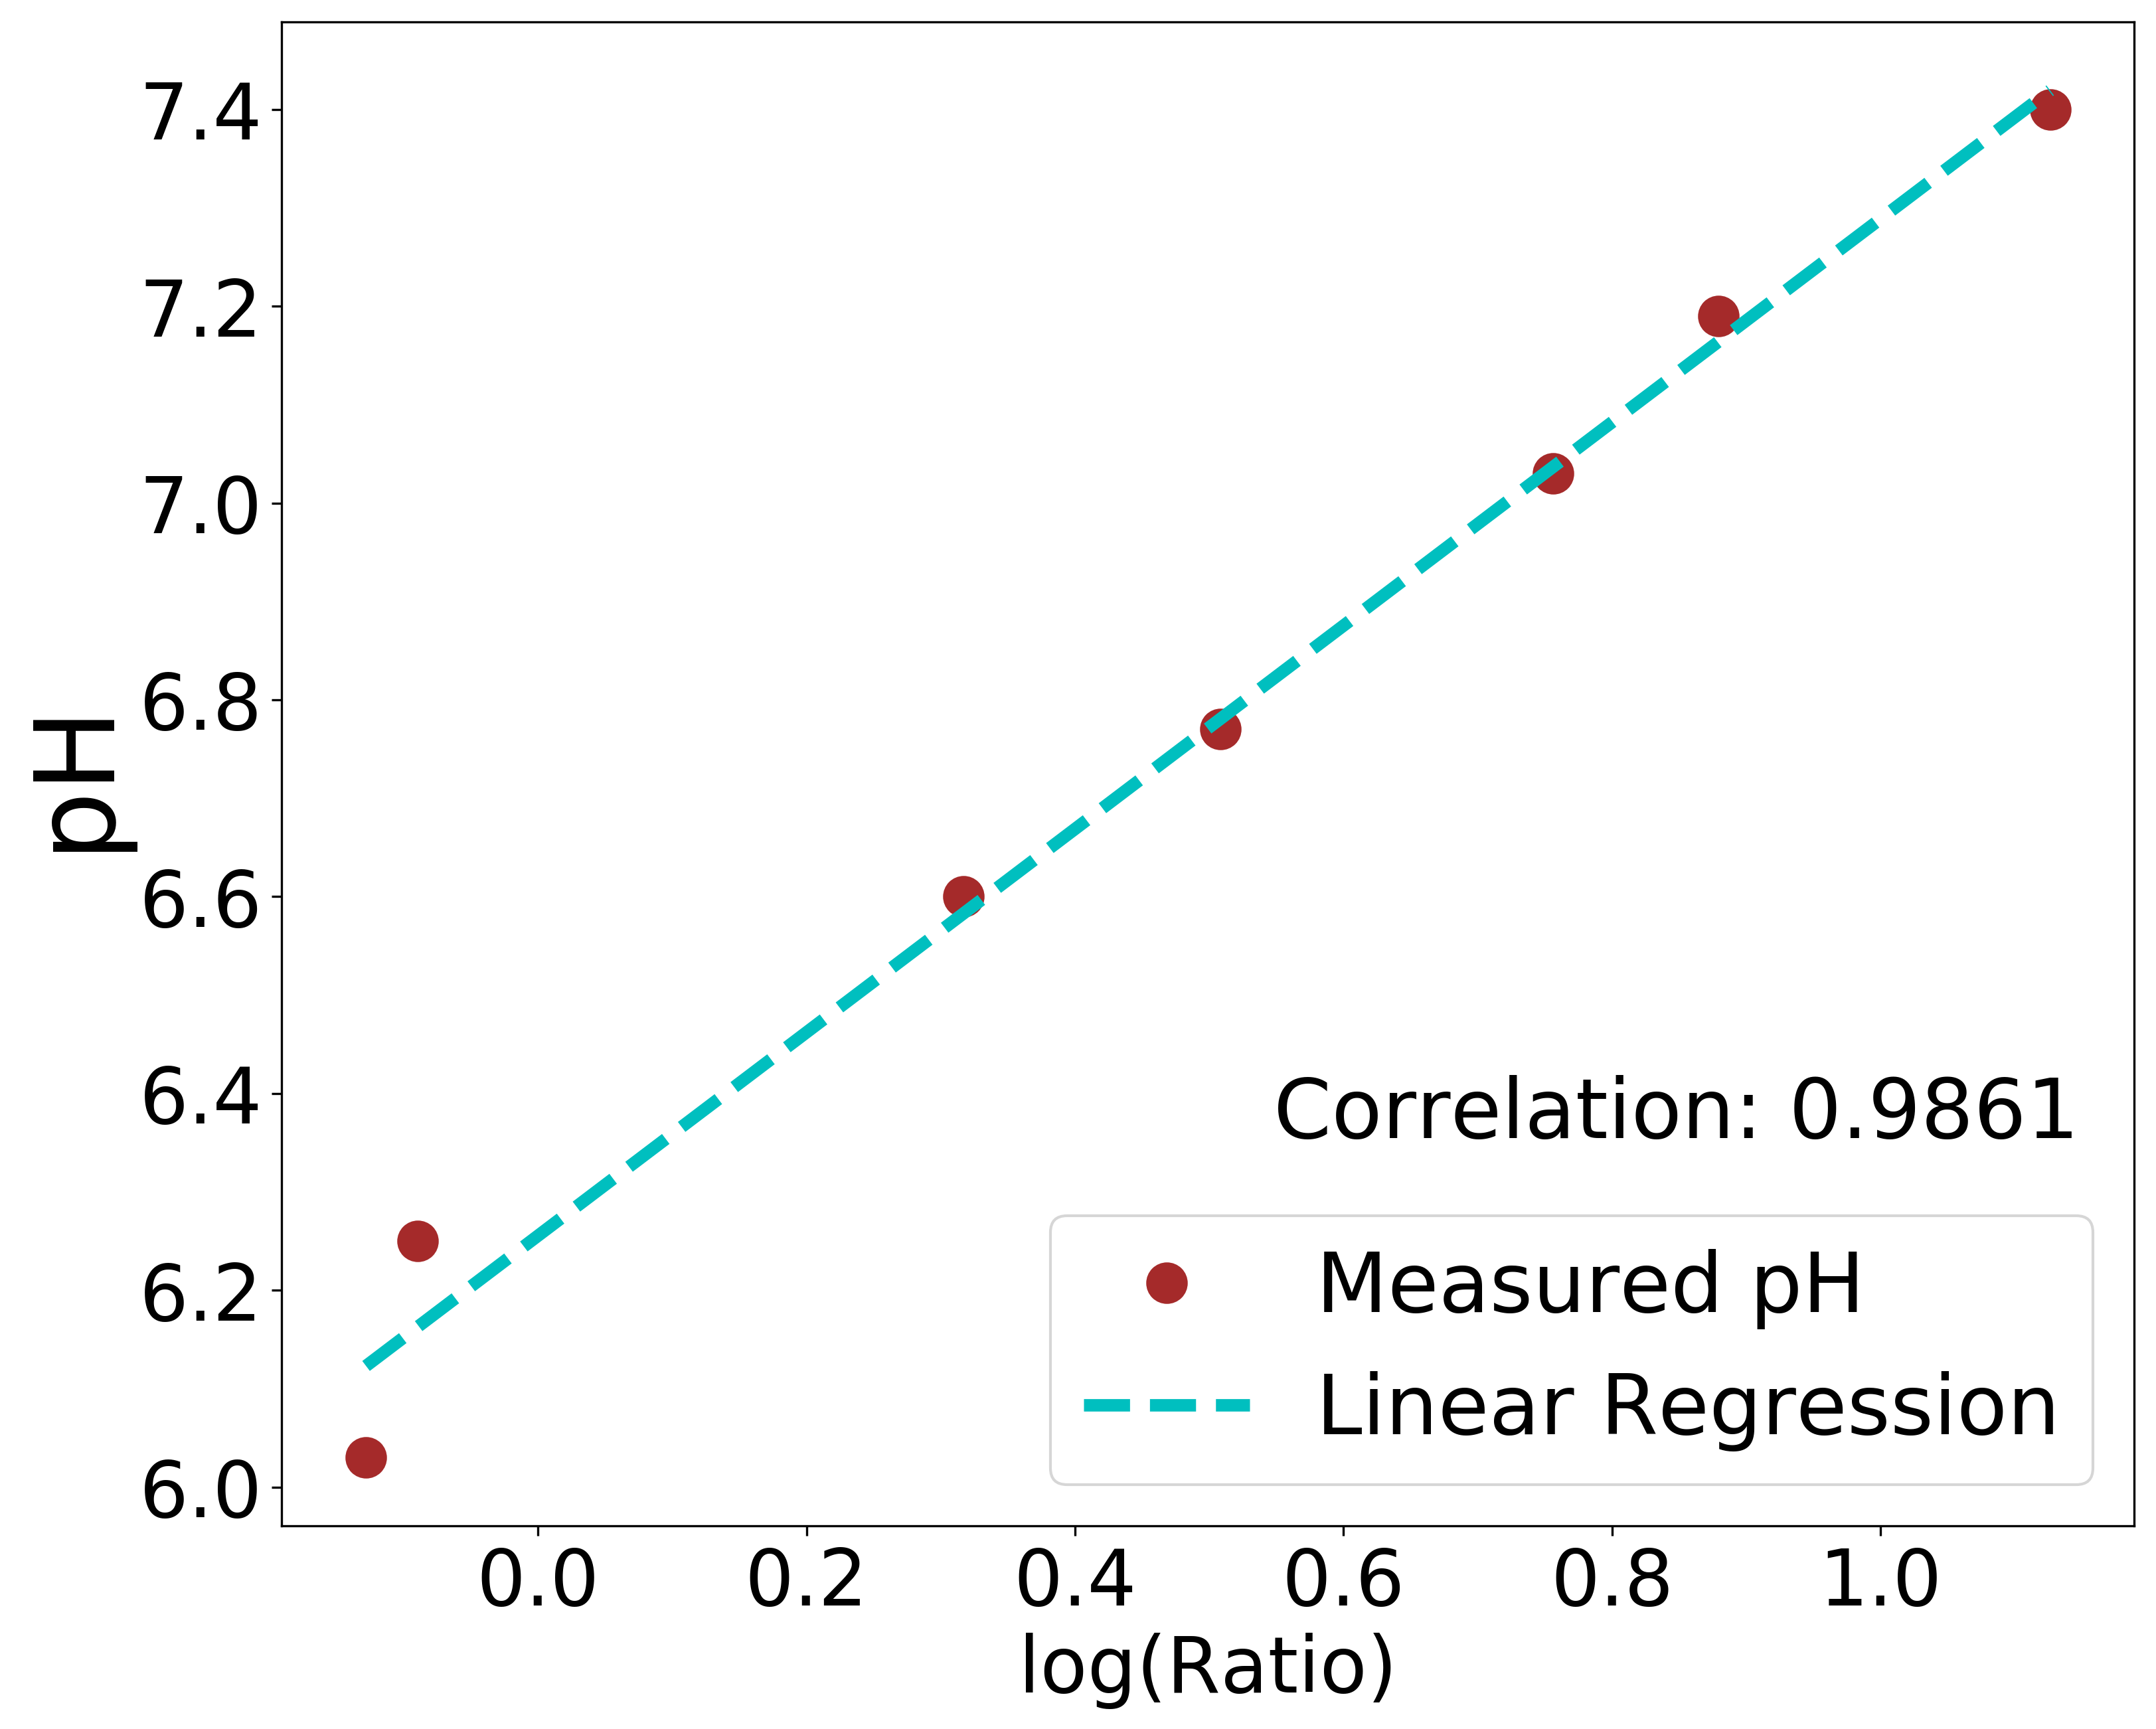

In [51]:
lregress = LinearRegression(fit_intercept = True, n_jobs=-1)
lregress.fit(X_train.reshape(-1,1),Y_train.reshape(-1,1))
Y_hat = lregress.predict(X_train.reshape(-1,1))
print('RSQ for ratiometric training: ',rsq(Y_train,Y_hat))
print('NRMSE for ratiometric training: ',mymetric(Y_train,Y_hat),'%')
plt.rc('font',size=28)
h=plt.figure(figsize=(12, 10), dpi= 300, facecolor='w', edgecolor='k');
plt.plot(X_train.squeeze(),Y_train.squeeze(),'o',label = 'Measured pH', markersize = 14,color='brown');
plt.hold;
plt.plot(X_train.squeeze(),Y_hat.squeeze(),'c--', label = 'Linear Regression',lw = 4.5);
plt.xlabel('log(Ratio)');
plt.ylabel('pH',fontsize=40);
plt.legend(loc='lower right',fontsize=30);
h.text(.54,.32,'Correlation: 0.9861',fontsize = 30);
plt.savefig('pH_vs_ratio_fitting_iso_lin.tif',dpi = 300, format='tif')

RSQ for ratiometric fitting of averages:  0.719430383233
NRMSE for ratiometric fitting of averages:  4.57281501434 %


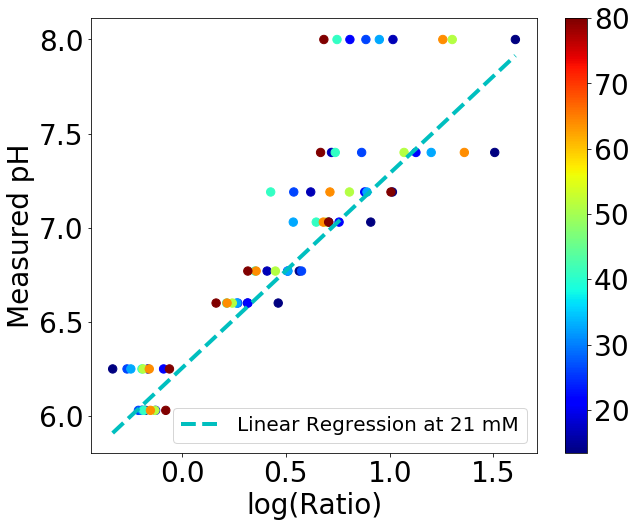

In [52]:
Y_hat = lregress.predict(X_test.reshape(-1,1));
x_plt = np.linspace(np.min(X_test),np.max(X_test),5);
y_plt = lregress.predict(x_plt.reshape(-1,1));
print('RSQ for ratiometric fitting of averages: ',rsq(Y_test,Y_hat))
print('NRMSE for ratiometric fitting of averages: ',mymetric(Y_test,Y_hat),'%')
plt.rc('font',size=28)
plt.scatter(X_test.squeeze(),Y_test.squeeze(),c=a_conc,s=70);
plt.colorbar();
plt.hold
plt.plot(x_plt.squeeze(),y_plt.squeeze(),'c--',label = 'Linear Regression at 21 mM',lw=4);
plt.xlabel('log(Ratio)');
plt.ylabel('Measured pH');
plt.legend(fontsize = 20);
plt.savefig('pH_vs_ratio_all_iso_lin.tif',dpi = 300, format='tif')

In [39]:
plt.scatter?

In [11]:
'''
import seaborn as sns; 
import pandas as pd
df = pd.DataFrame(X_test.squeeze(),columns = ['ratio'])
df['pH'] = Y_test.squeeze()
ax = sns.regplot(x= "ratio", y="pH", data=df)
'''

'\nimport seaborn as sns; \nimport pandas as pd\ndf = pd.DataFrame(X_test.squeeze(),columns = [\'ratio\'])\ndf[\'pH\'] = Y_test.squeeze()\nax = sns.regplot(x= "ratio", y="pH", data=df)\n'

In [12]:
'''df = pd.DataFrame(Y_test.squeeze(),columns = ['Measured pH'])
df['Estimated pH'] = Y_hat.squeeze()
ax = sns.regplot(x= "Measured pH", y="Estimated pH", data=df)
'''

'df = pd.DataFrame(Y_test.squeeze(),columns = [\'Measured pH\'])\ndf[\'Estimated pH\'] = Y_hat.squeeze()\nax = sns.regplot(x= "Measured pH", y="Estimated pH", data=df)\n'

RSQ for all voxels, all pHs:  -0.632529894727
NRMSE for all voxels, all pHs:  11.6374494812 %


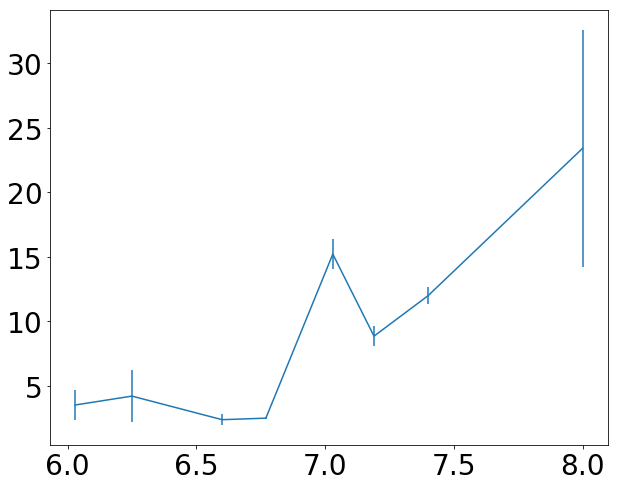

In [13]:
y_hat = lregress.predict(X_voxel.reshape(-1,1))
print('RSQ for all voxels, all pHs: ',rsq(Y_voxel,y_hat))
print('NRMSE for all voxels, all pHs: ',mymetric(Y_voxel,y_hat),'%')

Error_dum = np.zeros(Ys.shape)
Error_std = np.zeros(Ys.shape)
for idk,K in enumerate(np.arange(0,Ys.shape[0])):
    Error_dum[K] = mymetric(Y_voxel[np.where(Y_voxel==(np.ones(Y_voxel.shape)*Ys[K]))], y_hat[np.where(Y_voxel==(np.ones(Y_voxel.shape)*Ys[K]))])
    Error_std[K] = mystddev(Y_voxel[np.where(Y_voxel==(np.ones(Y_voxel.shape)*Ys[K]))], y_hat[np.where(Y_voxel==(np.ones(Y_voxel.shape)*Ys[K]))])


plt.errorbar(Ys,Error_dum, yerr = Error_std);
np.savetxt('NRMSE_iso_lin.csv',Error_dum,delimiter=',')

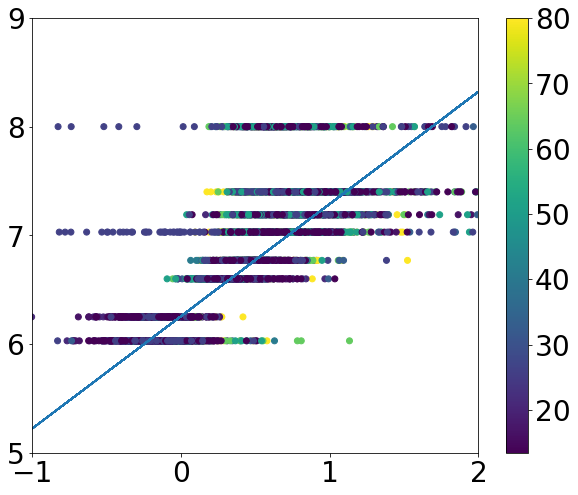

In [14]:
plt.scatter(X_voxel.squeeze(),Y_voxel.squeeze(),c=c_conc);
plt.colorbar();
plt.hold;
plt.plot(X_voxel.squeeze(),y_hat.squeeze(),'-'); plt.xlim((-1.0,2)); plt.ylim((5,9));

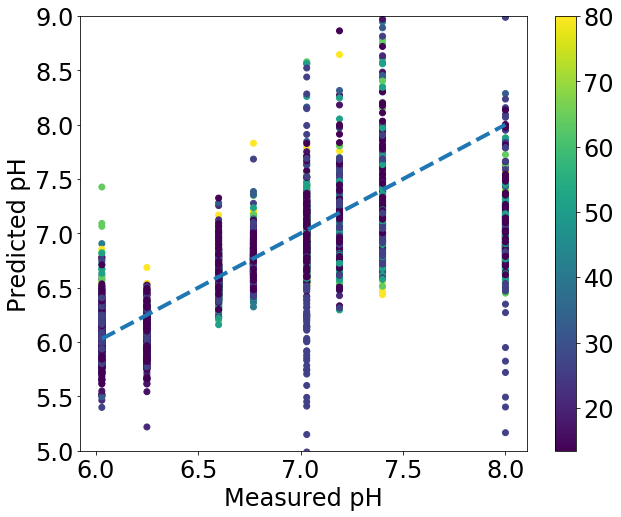

In [15]:
plt.rc('font',size=24)
plt.scatter(Y_voxel.squeeze(),y_hat.squeeze(),c=c_conc);
plt.colorbar();
plt.hold;
plt.plot(pHs,pHs,'--',lw = 4);
plt.ylabel('Predicted pH');
plt.ylim((5,9))
plt.xlabel('Measured pH');
plt.savefig('pred_vs_meas_iso_lin.tif',dpi = 300, format='tif')

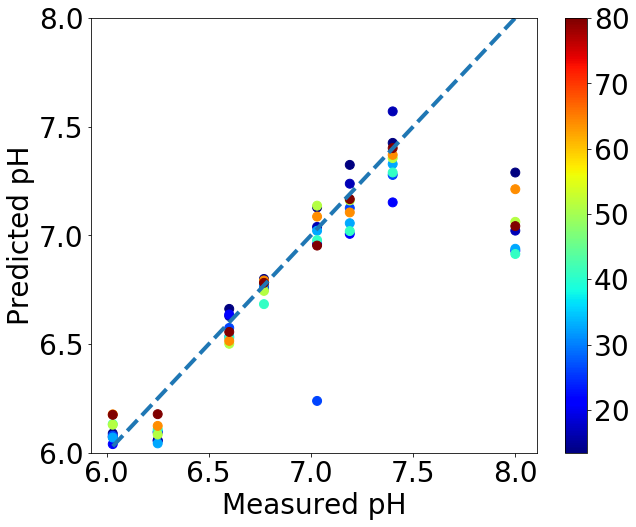

In [47]:
Error_dum = np.zeros((72,1))
pH_plt = np.zeros((72,1))
c_plt = np.zeros((72,1))
Y=Y_voxel
conc=c_conc
last_n = 0
for idk,p in enumerate(np.arange(0,Ys.shape[0])):
    for i,c in enumerate(np.arange(0,concs.shape[0])):
        y_plot = y_hat[Y==Ys[p]];
        y_plot = y_plot[conc[Y==Ys[p]]==concs[c]]
        Error_dum[c+last_n] = np.mean(y_plot)
        pH_plt[c+last_n] = Ys[p];
        c_plt[c+last_n] = concs[c];
    last_n=last_n+9;

fig = plt.figure();
ax = fig.add_subplot(1,1,1);
plt.scatter(pH_plt,Error_dum,c=c_plt,s=80);
plt.colorbar();
plt.plot(pHs,pHs,'--',lw = 4);
plt.ylabel('Predicted pH');
plt.ylim((6,8))
plt.xlabel('Measured pH');
#ax.fill_between(Ys, Error_dum+Error_std, Error_dum-Error_std, alpha=0.2);

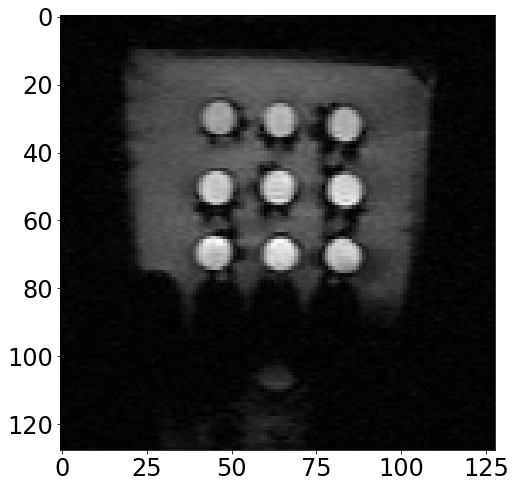

In [16]:
import BrukerMRI as bruker

img_pH = 7.40
d = str(deci(str(img_pH)).quantize(deci('10')**-2))
i = np.where(pHs==img_pH)

mainDir = './Images/pH'+d+'/'
expNum = 1 # 1 = CEST, 2 = T2, 3 = T1 if available
expObj = bruker.ReadExperiment(mainDir, expNum)
cest_img_set = np.flipud(expObj.proc_data)
anatomical = cest_img_set[:,:,0]

plt.imshow(anatomical);
plt.set_cmap('gray');

masks = pd.read_csv('mask.csv', header = None).values.squeeze()
masks = masks.reshape((128,8,128))

indices = np.nonzero(masks[:,i,:].squeeze().reshape((1,-1)))[1]
pH_mask = np.zeros((1,128*128))

Error_dum = np.zeros(Ys.shape)
Error_std = np.zeros(Ys.shape)
for idk,K in enumerate(np.arange(0,Ys.shape[0])):
    Error_dum[K] = mymetric(Y_voxel[np.where(Y_voxel==(np.ones(Y_voxel.shape)*Ys[K]))], y_hat[np.where(Y_voxel==(np.ones(Y_voxel.shape)*Ys[K]))])
    Error_std[K] = mystddev(Y_voxel[np.where(Y_voxel==(np.ones(Y_voxel.shape)*Ys[K]))], y_hat[np.where(Y_voxel==(np.ones(Y_voxel.shape)*Ys[K]))])

In [17]:
Y_hat = y_hat[np.where(Y_voxel==Ys[i])]

pH_mask[0,indices]=Y_hat.squeeze()
pH_mask = pH_mask.reshape((128,128))

In [18]:
plt.tick_params?

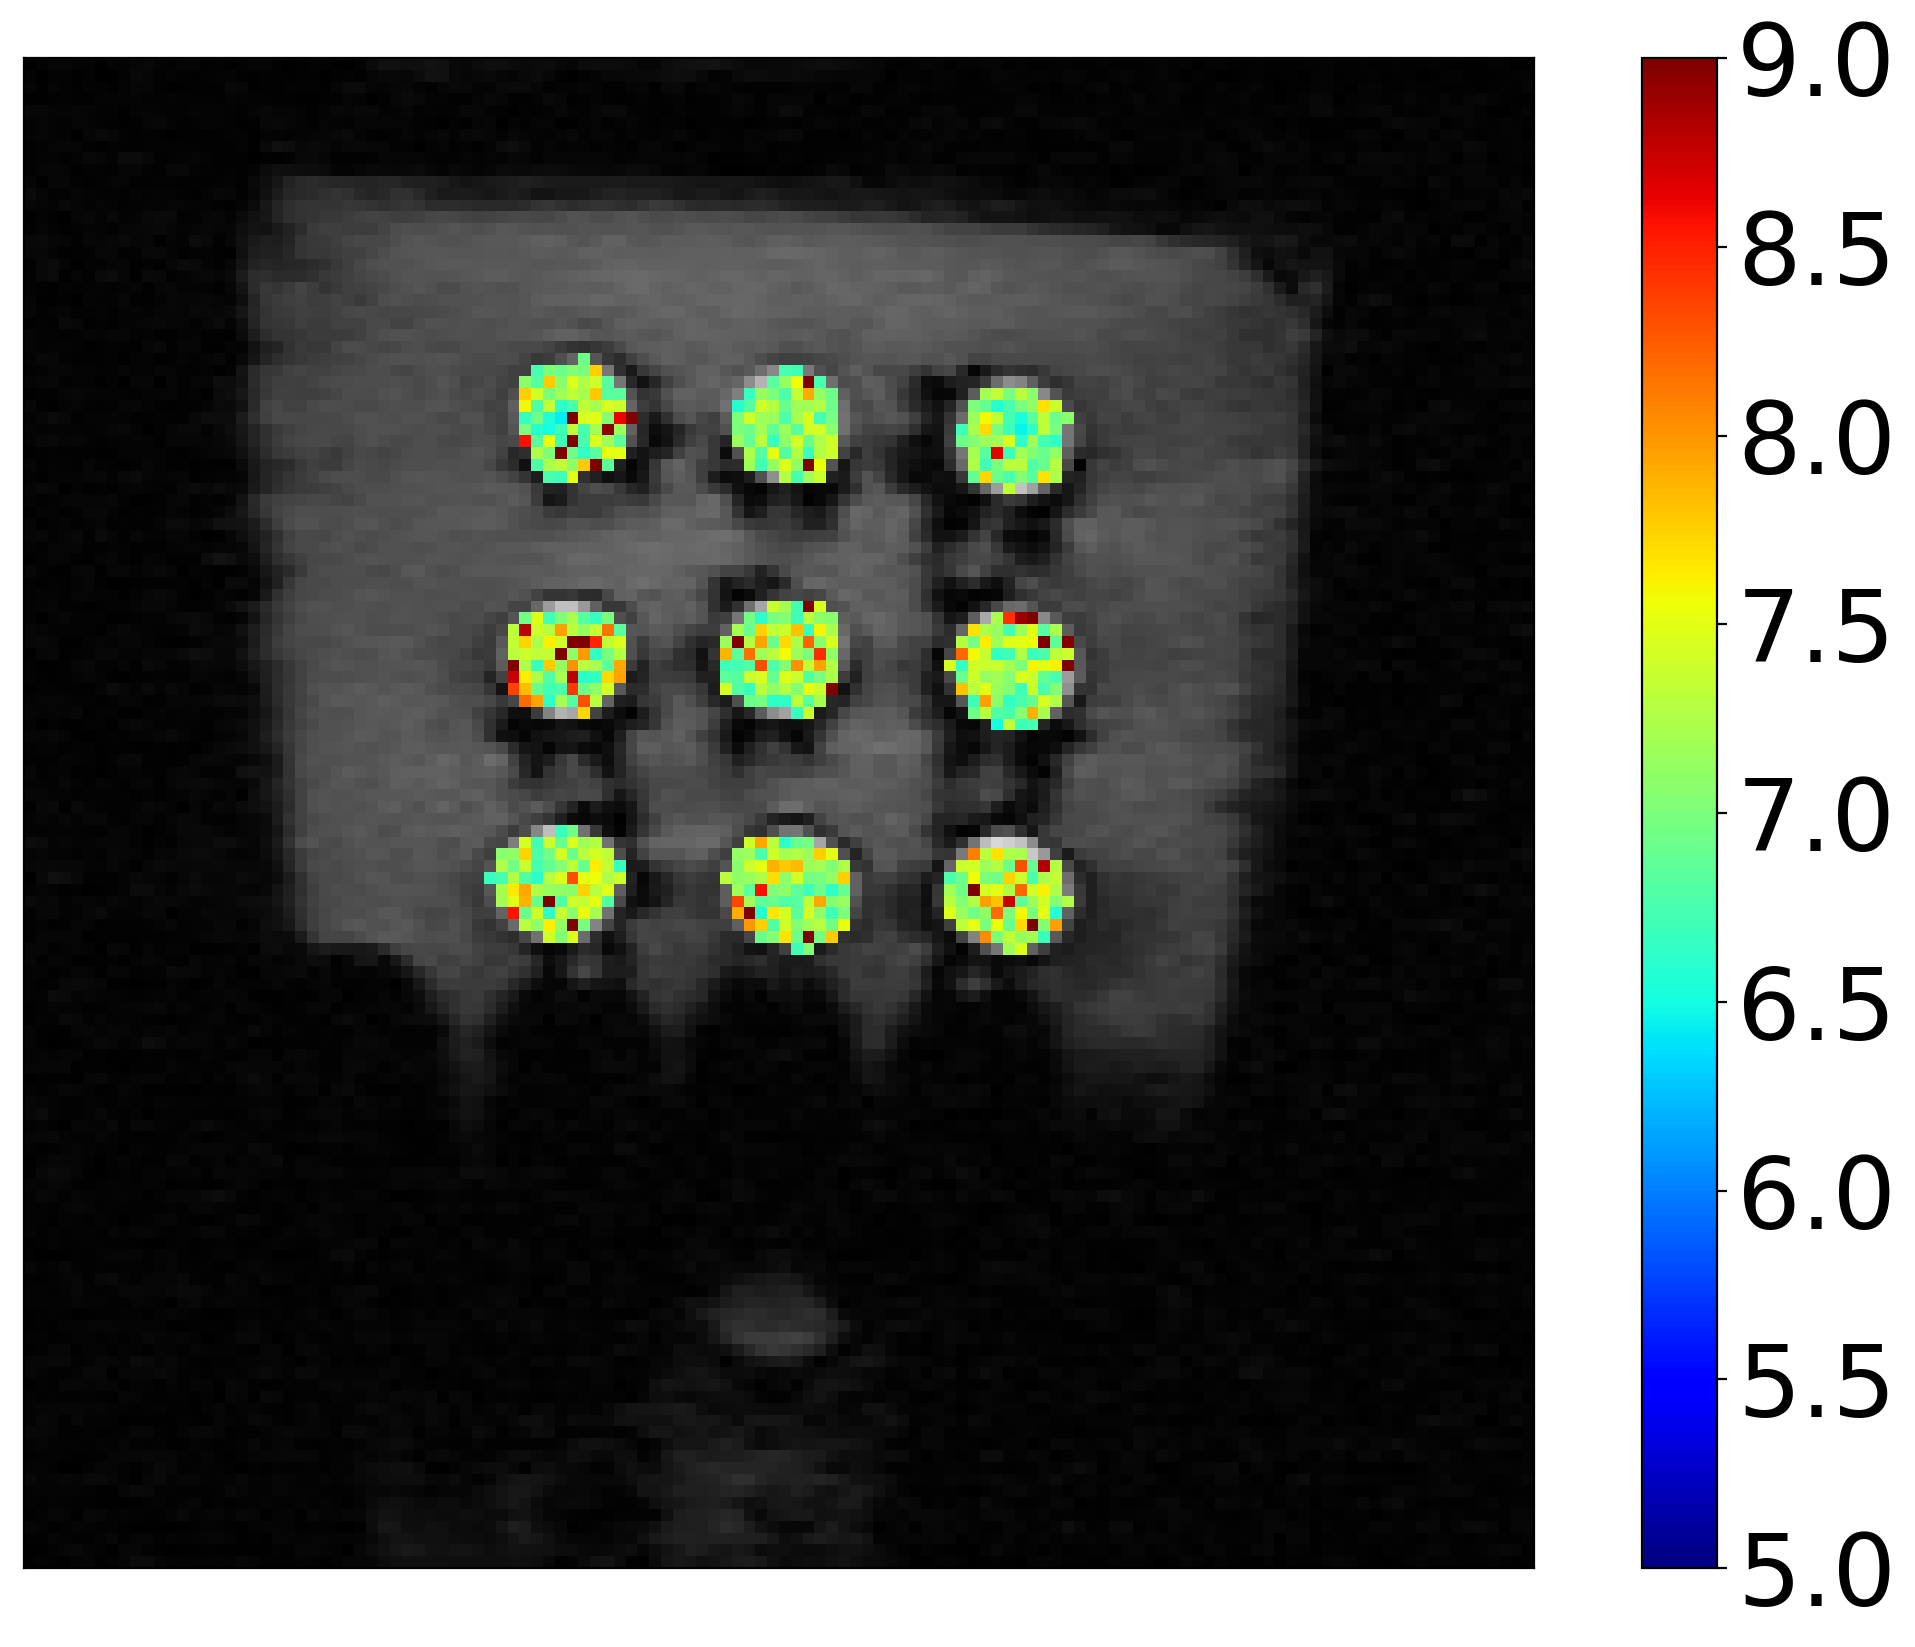

In [19]:
pH_masked = np.ma.masked_where(pH_mask==0,pH_mask)

plt.rc('font',size=36);
plt.figure(figsize=(14, 10), dpi= 200, facecolor='w', edgecolor='k');
plt.imshow(anatomical);
plt.set_cmap('gray');
plt.hold;
plt.imshow(pH_masked, vmin=5, vmax = 9);
plt.set_cmap('jet');
plt.colorbar();
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off', # ticks along the top edge are off
    left='off',
    labelbottom='off', labelleft='off'); # labels along the bottom edge are off
plt.savefig('pHmap_iso_lin.tif',dpi = 300, format='tif');

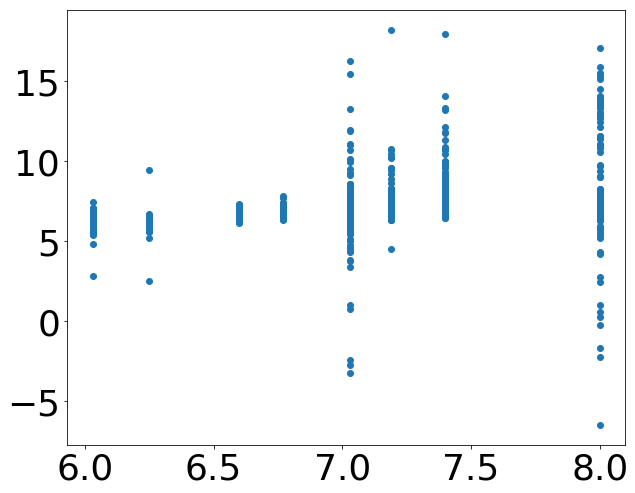

In [20]:
plt.plot(Y_voxel,y_hat,'o')